# <div style="background-color:lightblue; text-align:center; vertical-align: middle; padding:40px 0;"><p style="font-family: Arial; font-size:1em; color:BLACK; text-align: center;">2) Image Classification using Keras Deep Learning Python Library </p></div>

In [6]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


import tensorflow as tf
import numpy as np
import pandas as pd
import os
os.getcwd()
from keras.models import Sequential 
from keras.layers import Activation, Dense, Dropout
from keras.layers import Convolution2D, MaxPooling1D 
from keras.optimizers import Adam, SGD, RMSprop
#from keras import utils as np_utils
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical



from keras.layers import Conv2D, MaxPooling2D
import os
import matplotlib
matplotlib.use("Agg")
#import theano
from PIL import Image
from numpy import *
from sklearn.utils import shuffle
from keras.layers import Flatten
import cv2

import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

In [7]:
os.chdir('/Users/sameer/Desktop')



In [8]:
os.getcwd()

'/Users/sameer/Desktop'

In [ ]:
#os.chdir('/Users/priyavivekbhandarkar/Desktop/INSOFE/ALL MODULES INSOFE/CUTE 4/10_categories 2')



In [10]:
Image_path = os.path.join('/Users/sameer/Desktop/10_categories')
image_dir_labels = os.listdir(Image_path)
image_dir_labels

['airplanes',
 'grand_piano',
 'bonsai',
 'Leopards',
 'car_side',
 'watch',
 'Motorbikes',
 'BACKGROUND_Google',
 'Faces_easy',
 'Faces']

In [11]:
#get list of all images
imagenet_mean = np.array([104., 117., 124.], dtype=np.float32)

current_dir = os.getcwd()
image_dir = os.path.join(current_dir, '10_categories')




In [12]:
#get list of all images
img_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.jpeg')]



In [13]:
#load all images
imgs = []
for f in img_files:
    imgs.append(cv2.imread(f))
#plot images
fig = plt.figure(figsize=(15,6))
for i, img in enumerate(imgs):
    fig.add_subplot(1,3,i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

<Figure size 1080x432 with 0 Axes>

In [14]:
img_rows=224
img_cols=224
num_channel=1

In [15]:
img_data_list=[]
classes_names_list=[]


for dataset in image_dir_labels:
    classes_names_list.append(dataset) 
    print ('Loading images from {} folder\n'.format(dataset)) 
    img_list=os.listdir(Image_path +'/'+ dataset)
    #label = labels_name[dataset]

    for img in img_list:
        input_img=cv2.imread(Image_path + '/'+ dataset + '/'+ img )
        input_img_resize=cv2.resize(input_img,(img_rows, img_cols),cv2.IMREAD_GRAYSCALE)
        img_data_list.append(input_img_resize)
        classes_names_list.append(img_list)




Loading images from airplanes folder

Loading images from grand_piano folder

Loading images from bonsai folder

Loading images from Leopards folder

Loading images from car_side folder

Loading images from watch folder

Loading images from Motorbikes folder

Loading images from BACKGROUND_Google folder

Loading images from Faces_easy folder

Loading images from Faces folder



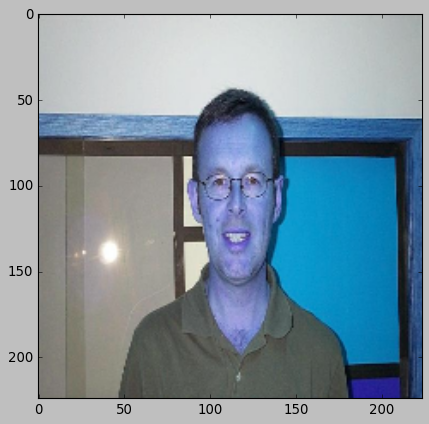

In [50]:
import matplotlib.pyplot as plt
plt.imshow(input_img_resize)  # graph it input_img_resize
plt.show()

In [17]:
num_labels = size(image_dir_labels)
print(num_labels)



10


In [18]:
num_classes = 10

labels_name={'airplanes':0,'BACKGROUND_Google':1,'bonsai':2,'car_side':3,'Faces':4,'Faces_easy':5,'grand_piano':6,'Leopards':7,'Motorbikes':8,'watch':9}




In [19]:
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

(3725, 224, 224, 3)


In [20]:
num_of_samples = img_data.shape[0]
num_of_samples




3725

In [21]:
input_shape = img_data[0].shape
input_shape  ##(224, 224, 3)--3D color image

(224, 224, 3)

In [22]:
classes = np.ones((num_of_samples,), dtype='int64')


classes[0:799]=0
classes[800:1267]=1
classes[1268:1395]=2
classes[1396:1518]=3
classes[1519:1953]=4
classes[1954:2388]=5
classes[2389:2487]=6
classes[2488:2687]=7
classes[2688:3485]=8
classes[3486:3724]=9

In [23]:
from keras.utils import to_categorical


# Assigning Labels

# Define the number of classes
num_classes = 10

# convert class labels to on-hot encoding
#Y = np_utils.to_categorical(classes, num_classes)
classes = to_categorical(classes, num_classes)

In [24]:
#Shuffle the dataset
from sklearn.utils import shuffle

X, Y = shuffle(img_data, classes, random_state=2)

In [25]:
# Split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [26]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)



Number transactions X_train dataset:  (2980, 224, 224, 3)
Number transactions y_train dataset:  (2980, 10)
Number transactions X_test dataset:  (745, 224, 224, 3)
Number transactions y_test dataset:  (745, 10)


# (2) Conv2D Model

In [29]:
# Defining the model
from keras.layers import Conv2D, MaxPooling2D
#input_shape=img_data[0].shape

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
  
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
  
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
  
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
  
    
# the model so far outputs 3D feature maps (height, width, features)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [30]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=["accuracy"])

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 222, 222, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 111, 111, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
__________

In [32]:
# Viewing model_configuration

model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable





True

In [33]:
history = model.fit(X_train, y_train, batch_size=, epochs=5, verbose=1, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 2980 samples, validate on 745 samples
Epoch 1/5
2980/2980 [==============================] - 681s 229ms/step - loss: 1.8519 - acc: 0.3829 - val_loss: 1.2395 - val_acc: 0.5517
Epoch 2/5
2980/2980 [==============================] - 742s 249ms/step - loss: 1.3157 - acc: 0.5349 - val_loss: 1.2516 - val_acc: 0.5745
Epoch 3/5
2980/2980 [==============================] - 776s 260ms/step - loss: 1.1550 - acc: 0.5826 - val_loss: 1.0223 - val_acc: 0.6081
Epoch 4/5
2980/2980 [==============================] - 863s 290ms/step - loss: 0.9340 - acc: 0.6302 - val_loss: 1.2130 - val_acc: 0.5423
Epoch 5/5
2980/2980 [==============================] - 845s 283ms/step - loss: 0.7848 - acc: 0.6889 - val_loss: 0.8083 - val_acc: 0.6550


In [ ]:
history = model.fit(X_train, y_train, batch_size=, epochs=5, verbose=1, validation_data=(X_test, y_test))

In [34]:
predi = model.predict(X_test)
predi[:10]

array([[7.67469779e-03, 3.58659518e-03, 5.64840483e-03, 3.09328455e-02,
        5.20190177e-03, 6.27363159e-04, 2.46533006e-02, 3.62466015e-02,
        3.29645902e-01, 5.55782318e-01],
       [4.07701213e-04, 1.44253159e-02, 3.71727906e-03, 2.24361718e-02,
        1.23849278e-03, 1.48406340e-04, 6.79230178e-03, 5.10570556e-02,
        1.11342199e-01, 7.88435042e-01],
       [6.44778848e-01, 3.50154378e-02, 2.83996784e-03, 1.88164599e-03,
        1.61438793e-01, 1.01139970e-01, 1.08723864e-02, 1.47014875e-02,
        2.50785947e-02, 2.25287303e-03],
       [9.99987006e-01, 6.17399166e-07, 9.62210436e-08, 2.36000819e-09,
        4.44493480e-06, 4.13665202e-06, 4.89845000e-08, 8.61933984e-07,
        2.82934138e-06, 2.39575582e-09],
       [5.27872995e-04, 5.02116978e-03, 6.45593554e-03, 1.17052607e-02,
        4.93322173e-03, 9.24199179e-04, 1.71428651e-03, 1.86968111e-02,
        2.59265900e-01, 6.90755367e-01],
       [1.82661588e-05, 4.30013606e-04, 2.44111987e-04, 5.61989495e-04,
   

In [36]:
# Evaluating the model

score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])



Test Loss: 0.8083114142385905
Test accuracy: 0.655033557086983


In [90]:
test_image = X_test[0:1]
print (test_image.shape)




(1, 224, 224, 3)


In [91]:
print(model.predict_classes(test_image))

[4]


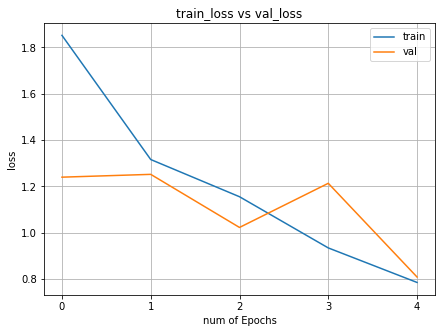

In [39]:
num_epoch = 5
# visualizing losses and accuracy
train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['acc']
val_acc=history.history['val_acc']

xc=range(num_epoch)
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])




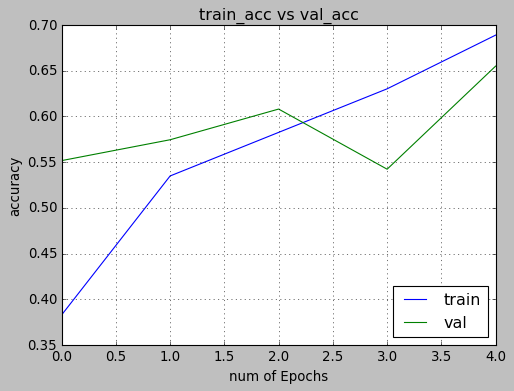

In [40]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [41]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')



In [44]:
img = test_image[0]

print(img.shape)

(224, 224, 3)


In [48]:
# Testing a new image
test_image1 = cv2.imread('/Users/sameer/Desktop/test_image-1551435475921.jpg')
test_image1 = cv2.cvtColor(test_image1, cv2.COLOR_BGR2GRAY)
test_image1 = cv2.resize(test_image1,(224, 224))
test_image1 = np.array(test_image1)
test_image1 = test_image.astype('float32')#test_image
test_image1 /= 255
print (test_image1.shape)



(1, 224, 224, 3)


In [49]:
# Predicting the test image
print((model.predict(test_image1)))
print(model.predict_classes(test_image1))



[[0.0105726  0.7681996  0.03211348 0.00669299 0.01417839 0.00596441
  0.01180373 0.06757462 0.08189359 0.00100651]]
[1]


In [ ]:
/////////////////////////////////////////////////

# (3) ImageDataGenerator- Augmentation

In [66]:
from keras.preprocessing.image import ImageDataGenerator
  
data_gen = ImageDataGenerator(
    rotation_range=20,
    shear_range=0.5, 
    zoom_range=0.4, 
    rescale=1./255,
    vertical_flip=True, 
    validation_split=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True) 
    

In [67]:
Gtrain_generator = data_gen.flow(
        X_train,
        y_train,
        batch_size=32, 
        shuffle=True,  
        subset="training")

In [69]:
Gtest_generator = data_gen.flow(
        X_test,
        y_test,
        batch_size=32, 
        shuffle=True,  
        subset="validation")

In [70]:
model.fit_generator(Gtrain_generator,steps_per_epoch = 1000, epochs = 3, validation_data=Gtest_generator,validation_steps = 500)
model.save_weights('first_try.h5')

Epoch 1/3
1000/1000 [==============================] - 10751s 11s/step - loss: 1.6703 - acc: 0.4164 - val_loss: 1.3353 - val_acc: 0.5412
Epoch 2/3
1000/1000 [==============================] - 11281s 11s/step - loss: 1.3285 - acc: 0.5278 - val_loss: 1.2699 - val_acc: 0.5214
Epoch 3/3
1000/1000 [==============================] - 11074s 11s/step - loss: 1.2031 - acc: 0.5575 - val_loss: 1.0866 - val_acc: 0.5805


In [71]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', scores[0])
print('Test accuracy:', scores[1])



Test Loss: 4.770145427780664
Test accuracy: 0.21073825504355784


In [78]:
y_test[:16]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [80]:
print(y_test)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [92]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(Image_path,
target_size = (224, 224),
batch_size = 32,
class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(Image_path,
target_size = (224, 224),
batch_size = 32,
class_mode = 'categorical')

Found 3724 images belonging to 10 classes.
Found 3724 images belonging to 10 classes.


In [93]:
training_set.class_indices

{'BACKGROUND_Google': 0,
 'Faces': 1,
 'Faces_easy': 2,
 'Leopards': 3,
 'Motorbikes': 4,
 'airplanes': 5,
 'bonsai': 6,
 'car_side': 7,
 'grand_piano': 8,
 'watch': 9}

In [94]:
test_set.class_indices

{'BACKGROUND_Google': 0,
 'Faces': 1,
 'Faces_easy': 2,
 'Leopards': 3,
 'Motorbikes': 4,
 'airplanes': 5,
 'bonsai': 6,
 'car_side': 7,
 'grand_piano': 8,
 'watch': 9}

In [86]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)




In [96]:
import numpy as np
from keras.preprocessing import image
test_image1 = image.load_img('/Users/sameer/Desktop/test_image-1551435475921.jpg', target_size = (224, 224))
test_image1 = load_image_into_numpy_array(test_image1)
test_image12 = np.expand_dims(test_image1, axis = 0)
result = model.predict(test_image12)



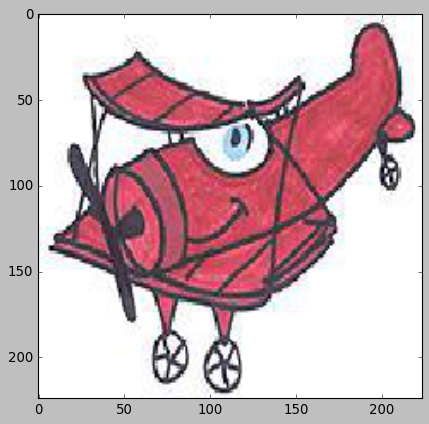

In [97]:
from matplotlib import pyplot as plt
plt.imshow(test_image1)

In [98]:
print((model.predict(test_image12)))
print(model.predict_classes(test_image12))



[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[7]


In [63]:
from keras.layers import Input, Dense

In [64]:
image_input = Input(shape=(img_rows, img_cols, num_channel))

In [ ]:
model.summary()

# (4) Alexnet Model

1. Convolution with 96 different filters in size of (3x3)
    * Max Pooling by 2
    - ReLU activation function
    - Batch Normalization
2. Convolution with 256 different filters in size of (3x3)
    * Max Pooling by 2
    - ReLU activation function
    - Batch Normalization
3. Convolution with 384 different filters in size of (3x3)

    - ReLU activation function
    - Batch Normalization
4. Convolution with 384 different filters in size of (3x3)

    - ReLU activation function
    - Batch Normalization
5. Convolution with 256 different filters in size of (3x3)

    - ReLU activation function
    - Batch Normalization
6. Flattening the 3-D output of the last convolving operations.
7. Fully Connected Layer with 128 units
    - Dropout
    - Batch Normalization
8. Fully Connected Layer with 256 units
    - Dropout
    - Batch Normalization
9. Fully Connected Layer with 512 units
    - Dropout
    - Batch Normalization
10. Fully Connected Layer with 1024 units
    - Dropout
    - Batch Normalization
11. Fully Connected Layer with 10 units (number of image classes)

In [100]:
# Create a sequential model
from keras.layers.normalization import BatchNormalization
np.random.seed(1000)

model3 = Sequential()

# 1st Convolutional Layer
model3.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),\
strides=(4,4), padding='valid'))
model3.add(Activation('relu'))
# Pooling 
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model3.add(BatchNormalization())

# 2nd Convolutional Layer
model3.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model3.add(Activation('relu'))
# Pooling
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model3.add(BatchNormalization())

# 3rd Convolutional Layer
model3.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model3.add(Activation('relu'))
# Batch Normalisation
model3.add(BatchNormalization())

# 4th Convolutional Layer
model3.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model3.add(BatchNormalization())

# 5th Convolutional Layer
model3.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model3.add(Activation('relu'))
# Pooling
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model3.add(BatchNormalization())

# Passing it to a dense layer
model3.add(Flatten())
# 1st Dense Layer
model3.add(Dense(4096, input_shape=(224*224*3,)))
model3.add(Activation('relu'))
# Add Dropout to prevent overfitting
model3.add(Dropout(0.4))
# Batch Normalisation
model3.add(BatchNormalization())

# 2nd Dense Layer
model3.add(Dense(4096))
model3.add(Activation('relu'))
# Add Dropout
model3.add(Dropout(0.4))
# Batch Normalisation
model3.add(BatchNormalization())

# 3rd Dense Layer
model3.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model3.add(Dropout(0.4))
# Batch Normalisation
model3.add(BatchNormalization())

# Output Layer
model3.add(Dense(num_classes))
model3.add(Activation('softmax'))

model3.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_2 (Activation)    (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_3 (Activation)    (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 256)         0         
__________

In [102]:
# (4) Compile 
model3.compile(loss='categorical_crossentropy', optimizer='adam',\
 metrics=['accuracy'])


In [105]:
# (5) Train
history3 = model3.fit(X_train, y_train, batch_size=64, epochs=3, verbose=1, \
validation_split=0.2, shuffle=True)


Train on 2384 samples, validate on 596 samples
Epoch 1/3
2384/2384 [==============================] - 205s 86ms/step - loss: 2.5505 - acc: 0.4560 - val_loss: 4.9472 - val_acc: 0.4950
Epoch 2/3
2384/2384 [==============================] - 215s 90ms/step - loss: 1.3815 - acc: 0.5373 - val_loss: 1.7624 - val_acc: 0.5789
Epoch 3/3
2384/2384 [==============================] - 246s 103ms/step - loss: 1.1174 - acc: 0.5965 - val_loss: 2.1226 - val_acc: 0.5101


In [106]:
scores3 = model3.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', scores3[0])
print('Test accuracy:', scores3[1])



Test Loss: 2.051433839733969
Test accuracy: 0.5194630872883252


In [109]:
predi3 = model3.predict(X_test)
predi3[:10]

array([[7.20148208e-04, 2.83363130e-04, 1.30115235e-02, 8.01228825e-03,
        5.88147494e-04, 1.06392254e-03, 6.34781737e-03, 2.33130087e-03,
        9.63474274e-01, 4.16729227e-03],
       [3.07035974e-09, 1.04125810e-08, 9.47811429e-07, 1.57663271e-06,
        1.33600260e-08, 5.37173776e-07, 1.47520213e-05, 1.46009222e-06,
        9.81193185e-01, 1.87875666e-02],
       [3.07771261e-05, 1.20350264e-03, 1.37343816e-03, 4.08093026e-03,
        3.06846305e-05, 2.63189704e-05, 1.92945804e-02, 6.10175123e-03,
        3.50298405e-01, 6.17559671e-01],
       [9.99999881e-01, 1.59656992e-07, 1.67787828e-08, 5.77139864e-11,
        1.42883552e-10, 2.38710207e-09, 3.77486237e-10, 8.40438996e-10,
        4.76927932e-14, 4.02173450e-09],
       [4.79480084e-12, 2.64148998e-11, 3.72780251e-09, 4.64539074e-09,
        7.27030380e-11, 1.81278192e-08, 3.05263654e-08, 3.21722182e-09,
        9.97572005e-01, 2.42784084e-03],
       [3.36421619e-13, 3.33956127e-11, 9.31458999e-09, 2.40774494e-08,
   

In [111]:
print(model3.predict_classes(test_image))

[8]


In [120]:
test_image3 = image.load_img('/Users/sameer/Desktop/test_image-1551435475921.jpg', target_size = (224, 224))
test_image31 = load_image_into_numpy_array(test_image3)
test_image32 = np.expand_dims(test_image31, axis = 0)
result32 = model3.predict(test_image32)

print(result32)

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


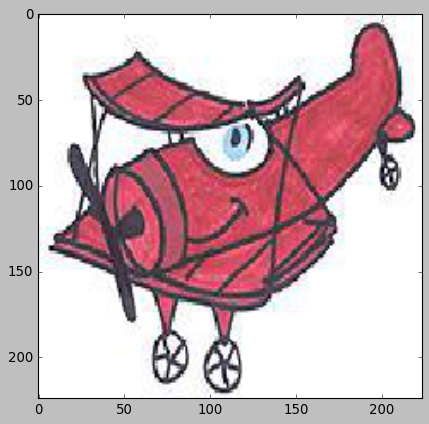

In [113]:

plt.imshow(test_image3)

In [121]:
print((model3.predict(test_image32)))
print(model3.predict_classes(test_image32))



[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[4]


In [127]:
from keras.applications import ResNet50


# (5) RESNET

In [129]:
RESNET_WEIGHTS_PATH = '../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'


94658560/94653016 [==============================] - 223s 2us/step


In [132]:
model4 = Sequential()
model4.add(ResNet50(include_top=False, pooling='max'))
model4.add(Dense(num_classes, activation='softmax'))
# ResNet-50 model is already trained, should not be trained
model4.layers[0].trainable = True

# (6) VGG

In [140]:
from keras.applications.vgg16 import VGG16
import keras
Vgg_m = keras.applications.vgg16.VGG16()

In [141]:
Vgg_m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [143]:
type(Vgg_m) #This is a Keras Functional API need to convert to sequential
model = Sequential() #Iterate over the functional layers and add it as a stack
for layer in Vgg_m.layers:
    model.add(layer)

In [144]:
model.layers.pop()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [145]:
for layer in model.layers: #Since the model is already trained with certain weights, we dont want to change it. Let it be the same
    layer.trainable = False

In [146]:
model.add(Dense(10, activation='softmax')) # Add the last layer
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [149]:
# Complie the model
model.compile(Adam(lr=.00015), loss='categorical_crossentropy', metrics=['accuracy'])


In [155]:
his = model.fit_generator(training_set, validation_data=test_set, steps_per_epoch=20, validation_steps=20, epochs=2, verbose=1)



Epoch 1/2
20/20 [==============================] - 547s 27s/step - loss: 2.3014 - acc: 0.2078 - val_loss: 2.2994 - val_acc: 0.2188
Epoch 2/2
20/20 [==============================] - 599s 30s/step - loss: 2.2985 - acc: 0.2094 - val_loss: 2.2964 - val_acc: 0.2266


In [156]:
prediv = model.predict(X_test)
prediv[:10]

array([[0.10201191, 0.10016565, 0.10161313, 0.09965488, 0.09946992,
        0.10201378, 0.09895261, 0.0987767 , 0.09852583, 0.09881562],
       [0.10238899, 0.10009966, 0.10229767, 0.10020559, 0.09896674,
        0.10259267, 0.09867845, 0.09818805, 0.09821793, 0.09836422],
       [0.10137978, 0.10008521, 0.10100388, 0.09927099, 0.0997651 ,
        0.10248122, 0.09925941, 0.09888979, 0.09909321, 0.09877133],
       [0.10085014, 0.10001364, 0.10013877, 0.09869158, 0.10043322,
        0.10198832, 0.09967268, 0.09941589, 0.09934739, 0.09944846],
       [0.10148083, 0.10013948, 0.10082352, 0.09920719, 0.09991618,
        0.10210095, 0.09937238, 0.09909094, 0.09890103, 0.09896743],
       [0.10121051, 0.10011561, 0.10034026, 0.09871391, 0.10005542,
        0.10224053, 0.09960452, 0.09942338, 0.09930261, 0.09899323],
       [0.100794  , 0.09994684, 0.10012643, 0.09868814, 0.10042407,
        0.10209267, 0.09976354, 0.0994453 , 0.0993554 , 0.09936368],
       [0.10107099, 0.09997813, 0.1007113

In [157]:
scoresv = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', scoresv[0])
print('Test accuracy:', scoresv[1])




Test Loss: 2.3004674783489047
Test accuracy: 0.12885906042268613


In [158]:
predictions = model.predict_generator(test_set, steps=1, verbose=0)
predictions

array([[0.10071767, 0.09976796, 0.10034125, 0.09859372, 0.10024484,
        0.10241473, 0.09974685, 0.09939478, 0.09963054, 0.09914767],
       [0.10159673, 0.10023246, 0.10083706, 0.09909377, 0.09975865,
        0.1019827 , 0.09934428, 0.09921557, 0.09895192, 0.09898684],
       [0.10063893, 0.10001609, 0.10021599, 0.09874655, 0.10047582,
        0.1023671 , 0.09978325, 0.09918724, 0.09937028, 0.09919874],
       [0.10131387, 0.09997029, 0.10082689, 0.09918994, 0.0998967 ,
        0.10225198, 0.09935587, 0.09918479, 0.09896629, 0.09904336],
       [0.10081245, 0.09996516, 0.100251  , 0.09864365, 0.10036916,
        0.10212584, 0.09959044, 0.09953614, 0.09947632, 0.09922986],
       [0.10086065, 0.10016292, 0.10009506, 0.0988339 , 0.10045654,
        0.10205489, 0.09956122, 0.09939024, 0.09930851, 0.09927604],
       [0.10142682, 0.09993197, 0.10131974, 0.09949619, 0.09978392,
        0.10242729, 0.09919906, 0.09876183, 0.09879833, 0.0988548 ],
       [0.10111474, 0.10013162, 0.1006392

In [159]:
test_imagev = image.load_img('/Users/sameer/Desktop/test_image-1551435475921.jpg', target_size = (224, 224))
test_imagev1 = load_image_into_numpy_array(test_imagev)
test_imagev2 = np.expand_dims(test_imagev1, axis = 0)
resultv2 = model.predict(test_imagev2)

print(resultv2)

[[0.10193463 0.09643152 0.099177   0.10076845 0.10043862 0.10121509
  0.10277778 0.09854753 0.10409856 0.09461086]]


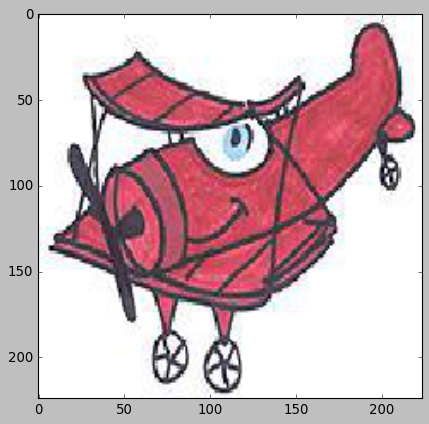

In [160]:
plt.imshow(test_imagev)

In [161]:
print((model.predict(test_imagev2)))
print(model.predict_classes(test_imagev2))




[[0.10193463 0.09643152 0.099177   0.10076845 0.10043862 0.10121509
  0.10277778 0.09854753 0.10409856 0.09461086]]
[8]
